In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Imports needed for the script
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
csv_original = 'ceneval_mentor_v3.csv'
df= pd.read_csv(csv_original, encoding='latin-1', low_memory=False)

In [3]:
#check the decoration
df.columns

Index(['Unnamed: 0', 'TIPO_EXA', 'ANO_NAC', 'SEXO', 'LENG_MA', 'LENG_PA',
       'PLT_PROC', 'RAZ_RAPT', 'RAZ_RACT', 'RAZ_OPT',
       ...
       'SER_TVP', 'SER_TABL', 'CUARTOS', 'SER_PC', 'SER_TV', 'SER_AUTO',
       'SER_BANO', 'VAC_RM', 'DICTAMEN', 'VECES_EXAM'],
      dtype='object', length=120)

In [5]:
#descriptive statistics summary
df['DICTAMEN'].describe()

count    15613.000000
mean         0.521809
std          0.499540
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: DICTAMEN, dtype: float64

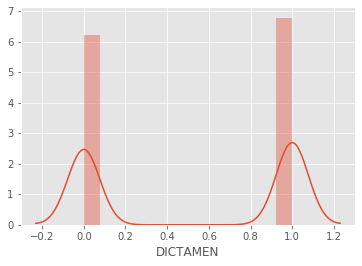

In [6]:
#histogram
sns.distplot(df['DICTAMEN']);

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df['DICTAMEN'].skew())
print("Kurtosis: %f" % df['DICTAMEN'].kurt())

Skewness: -0.087326
Kurtosis: -1.992629


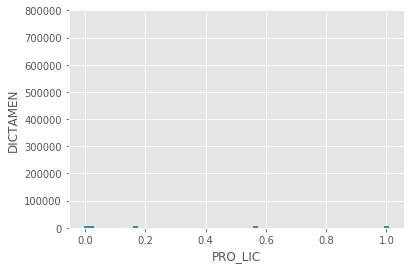

In [10]:
#scatter plot grlivarea/saleprice
var = 'PRO_LIC'
data = pd.concat([df['DICTAMEN'], df[var]], axis=1)
data.plot.scatter(x=var, y='DICTAMEN', ylim=(0,800000));

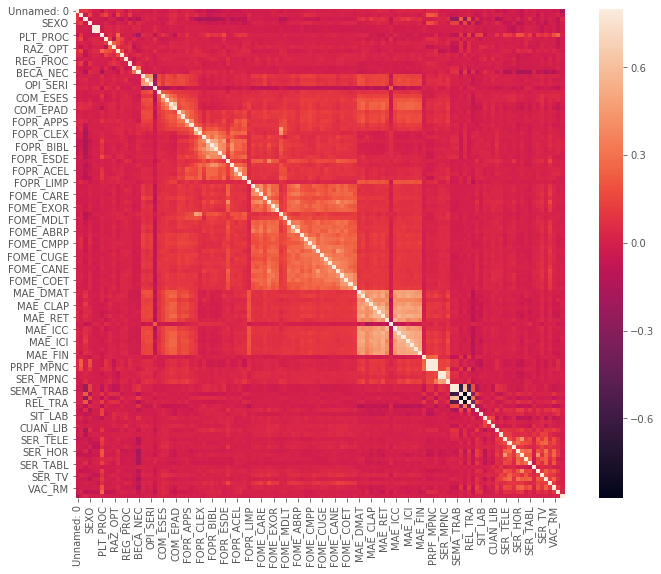

In [11]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

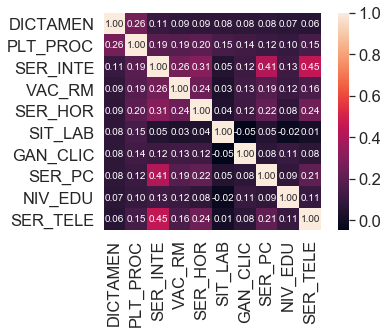

In [23]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'DICTAMEN')['DICTAMEN'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

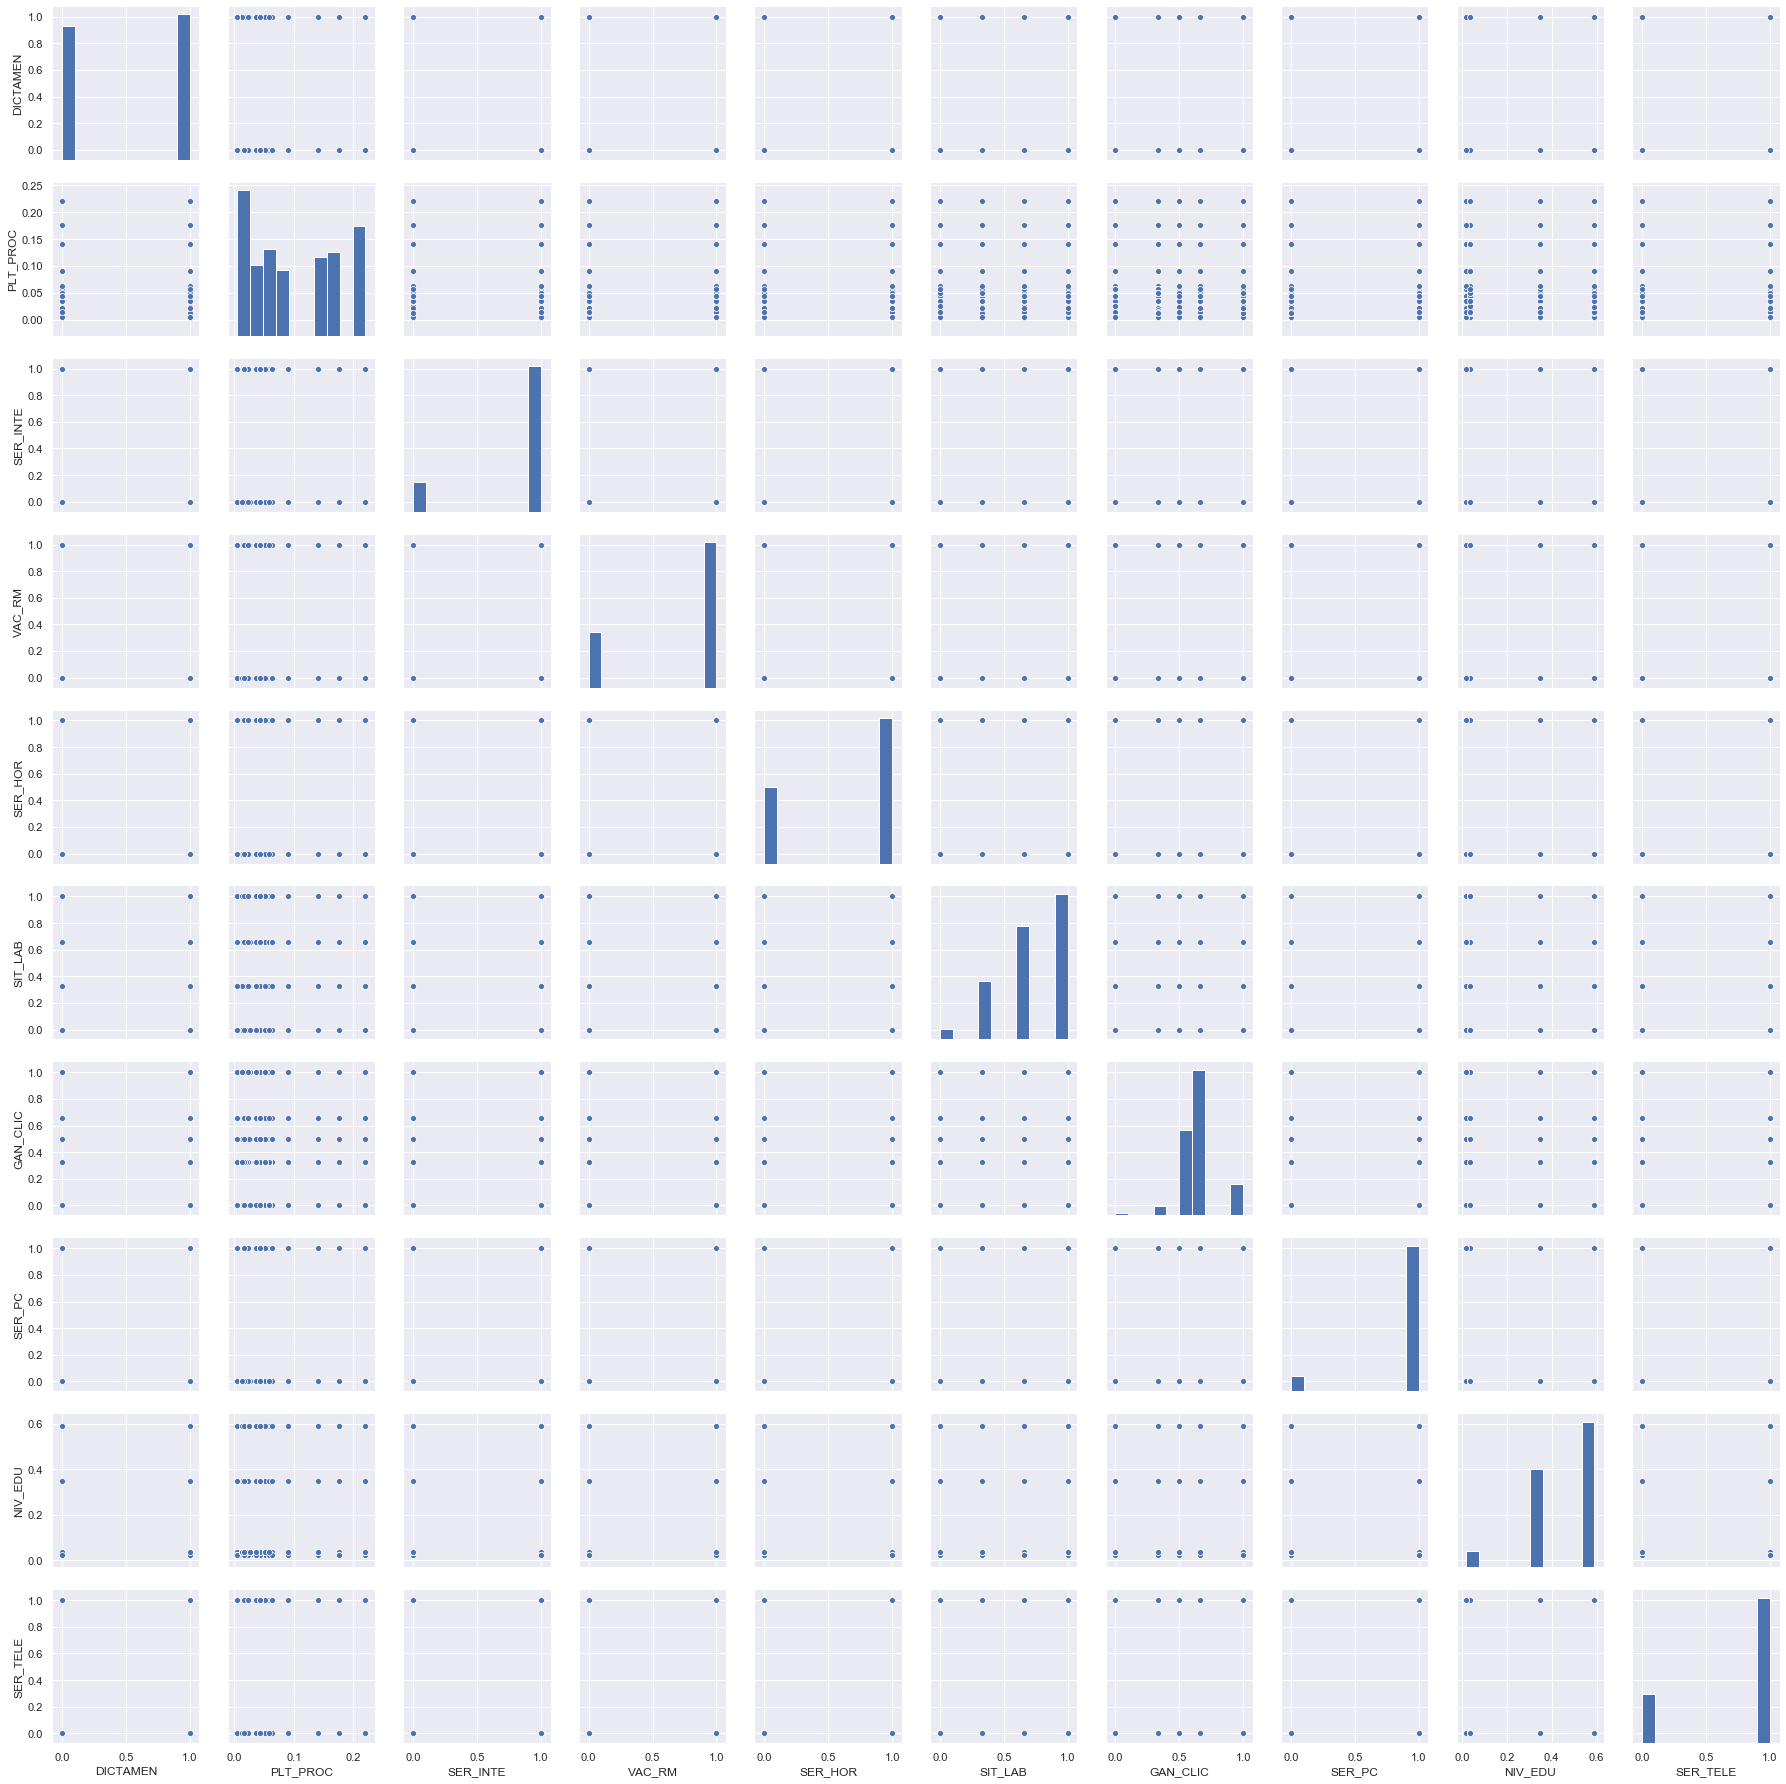

In [26]:
#scatterplot
sns.set()
cols = ['DICTAMEN', 'PLT_PROC', 'SER_INTE', 'VAC_RM', 'SER_HOR','SIT_LAB','GAN_CLIC','SER_PC','NIV_EDU','SER_TELE']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [28]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(120)

,Total,Percent
VECES_EXAM,0,0.0
DICTAMEN,0,0.0
FOPR_AULA,0,0.0
FOPR_LATA,0,0.0
FOPR_BIBL,0,0.0
FOPR_SACO,0,0.0
FOPR_CAFE,0,0.0
FOPR_ESDE,0,0.0
FOPR_SDTE,0,0.0
FOPR_ACIN,0,0.0


In [29]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['DICTAMEN'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.04461165]
 [-1.04461165]
 [-1.04461165]
 [-1.04461165]
 [-1.04461165]
 [-1.04461165]
 [-1.04461165]
 [-1.04461165]
 [-1.04461165]
 [-1.04461165]]

outer range (high) of the distribution:
[[0.95729355]
 [0.95729355]
 [0.95729355]
 [0.95729355]
 [0.95729355]
 [0.95729355]
 [0.95729355]
 [0.95729355]
 [0.95729355]
 [0.95729355]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


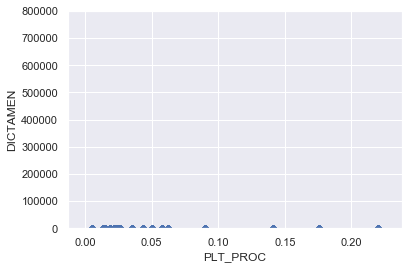

In [30]:
#bivariate analysis saleprice/grlivarea
var = 'PLT_PROC'
data = pd.concat([df['DICTAMEN'], df[var]], axis=1)
data.plot.scatter(x=var, y='DICTAMEN', ylim=(0,800000));

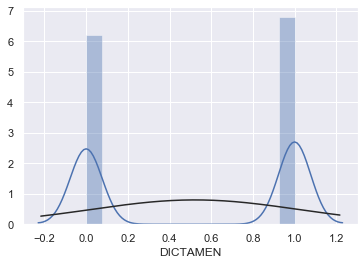

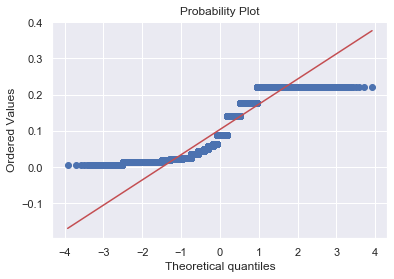

In [31]:
#histogram and normal probability plot
sns.distplot(df['DICTAMEN'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['PLT_PROC'], plot=plt)

In [33]:
pd.value_counts(df['TIPO_EXA'])

0.1087    1680
0.0655    1311
0.0705    1094
0.0618    1002
0.0520     944
0.0680     867
0.0381     757
0.0583     743
0.0394     666
0.0411     621
0.0294     447
0.0303     405
0.0346     386
0.0382     377
0.0012     371
0.0189     347
0.0204     335
0.0197     277
0.0112     276
0.0028     275
0.0187     256
0.0192     247
0.0228     226
0.0191     225
0.0175     225
0.0123     202
0.0077     198
0.0157     194
0.0079     133
0.0004     118
0.0108     112
0.0088     100
0.0087      93
0.0039      81
0.0018      20
0.0000       2
Name: TIPO_EXA, dtype: int64

In [35]:
pd.value_counts(df['ANO_NAC'])

0.78125    3958
0.75000    3042
0.81250    2789
0.84375    1680
1.00000    1615
0.87500     975
0.90625     650
0.93750     448
0.96875     315
0.71875     111
0.65625      16
0.68750      13
0.62500       1
Name: ANO_NAC, dtype: int64

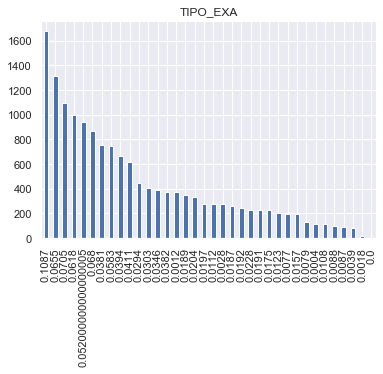

In [36]:
plot = df['TIPO_EXA'].value_counts().plot(kind='bar', title='TIPO_EXA')

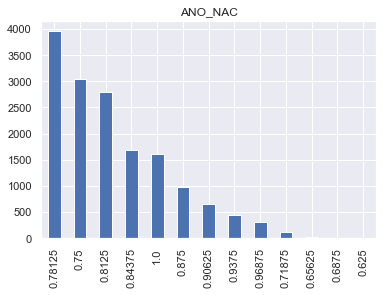

In [39]:
plot = df['ANO_NAC'].value_counts().plot(kind='bar', title='ANO_NAC')

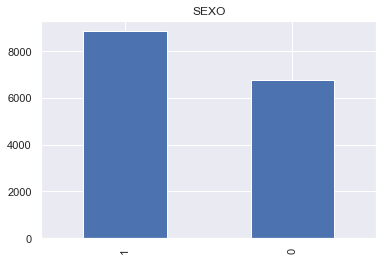

In [40]:
plot = df['SEXO'].value_counts().plot(kind='bar', title='SEXO')

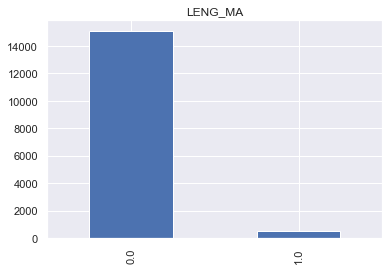

In [41]:
plot = df['LENG_MA'].value_counts().plot(kind='bar', title='LENG_MA')

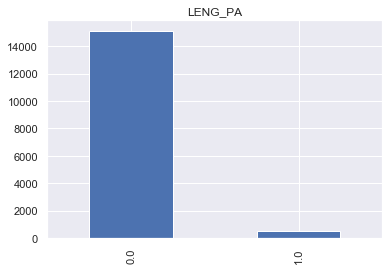

In [42]:
plot = df['LENG_PA'].value_counts().plot(kind='bar', title='LENG_PA')

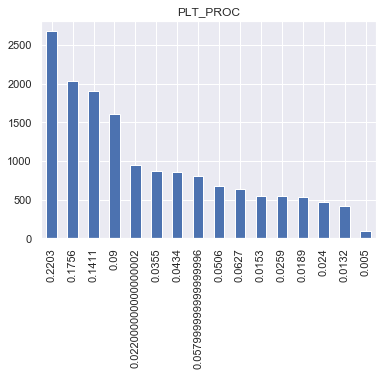

In [43]:
plot = df['PLT_PROC'].value_counts().plot(kind='bar', title='PLT_PROC')

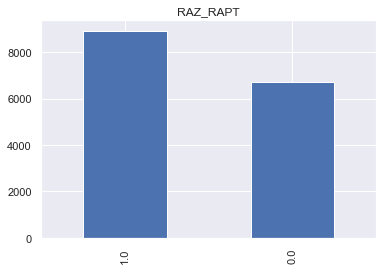

In [44]:
plot = df['RAZ_RAPT'].value_counts().plot(kind='bar', title='RAZ_RAPT')

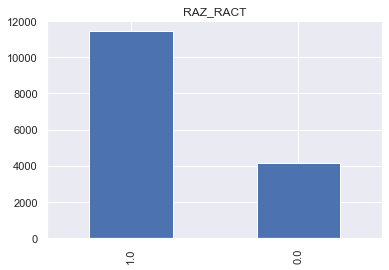

In [45]:
plot = df['RAZ_RACT'].value_counts().plot(kind='bar', title='RAZ_RACT')

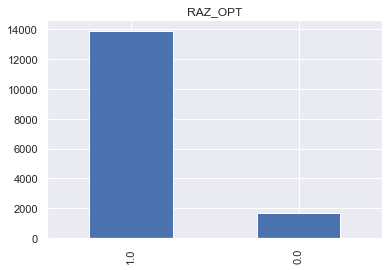

In [46]:
plot = df['RAZ_OPT'].value_counts().plot(kind='bar', title='RAZ_OPT')

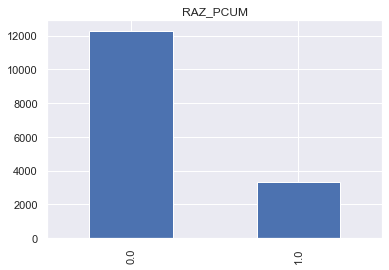

In [47]:
plot = df['RAZ_PCUM'].value_counts().plot(kind='bar', title='RAZ_PCUM')

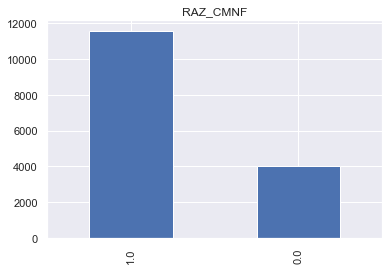

In [48]:
plot = df['RAZ_CMNF'].value_counts().plot(kind='bar', title='RAZ_CMNF')

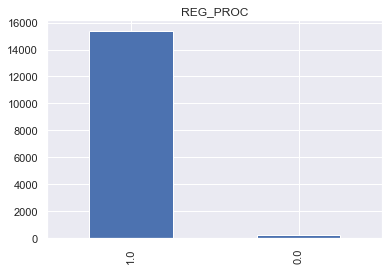

In [49]:
plot = df['REG_PROC'].value_counts().plot(kind='bar', title='REG_PROC')

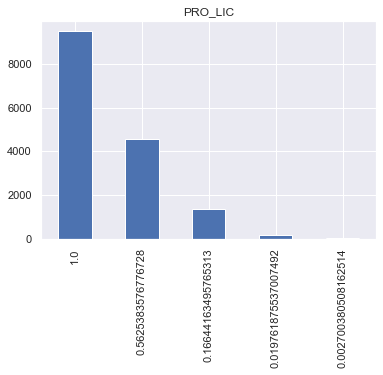

In [50]:
plot = df['PRO_LIC'].value_counts().plot(kind='bar', title='PRO_LIC')

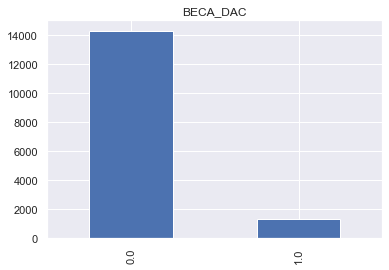

In [51]:
plot = df['BECA_DAC'].value_counts().plot(kind='bar', title='BECA_DAC')

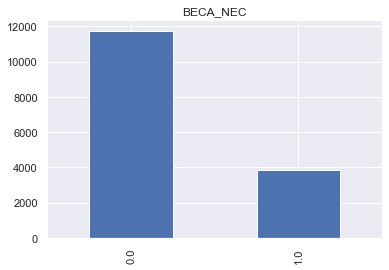

In [52]:
plot = df['BECA_NEC'].value_counts().plot(kind='bar', title='BECA_NEC')

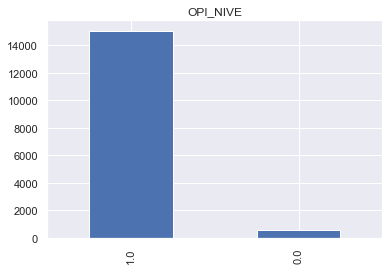

In [53]:
plot = df['OPI_NIVE'].value_counts().plot(kind='bar', title='OPI_NIVE')

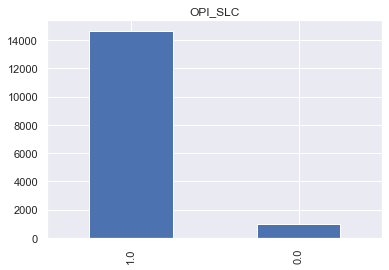

In [54]:
plot = df['OPI_SLC'].value_counts().plot(kind='bar', title='OPI_SLC')

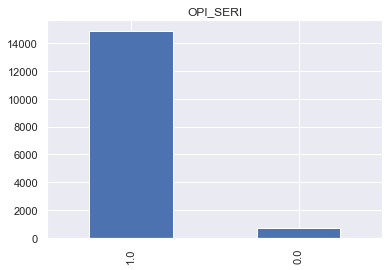

In [55]:
plot = df['OPI_SERI'].value_counts().plot(kind='bar', title='OPI_SERI')

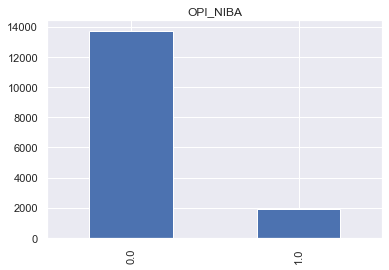

In [56]:
plot = df['OPI_NIBA'].value_counts().plot(kind='bar', title='OPI_NIBA')

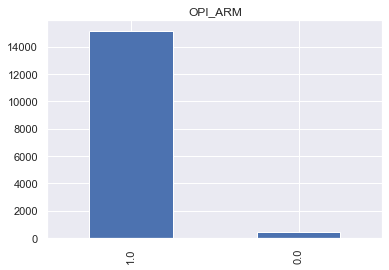

In [57]:
plot = df['OPI_ARM'].value_counts().plot(kind='bar', title='OPI_ARM')

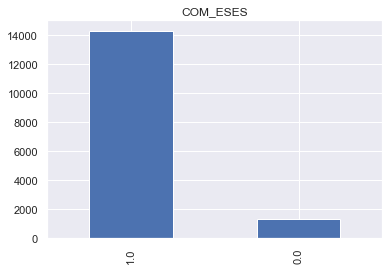

In [58]:
plot = df['COM_ESES'].value_counts().plot(kind='bar', title='COM_ESES')

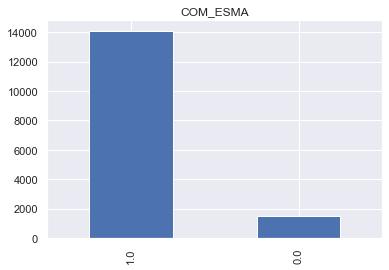

In [59]:
plot = df['COM_ESMA'].value_counts().plot(kind='bar', title='COM_ESMA')

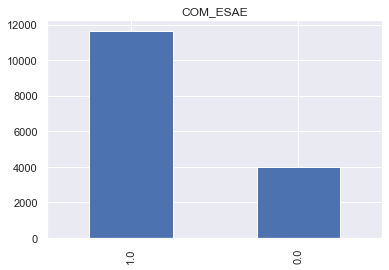

In [60]:
plot = df['COM_ESAE'].value_counts().plot(kind='bar', title='COM_ESAE')

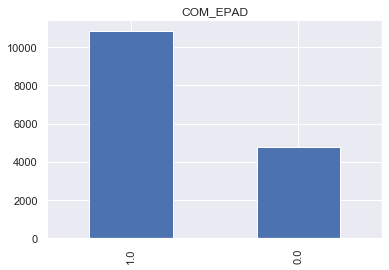

In [61]:
plot = df['COM_EPAD'].value_counts().plot(kind='bar', title='COM_EPAD')

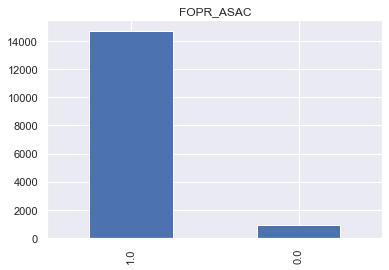

In [62]:
plot = df['FOPR_ASAC'].value_counts().plot(kind='bar', title='FOPR_ASAC')

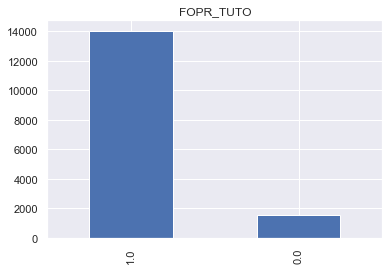

In [63]:
plot = df['FOPR_TUTO'].value_counts().plot(kind='bar', title='FOPR_TUTO')

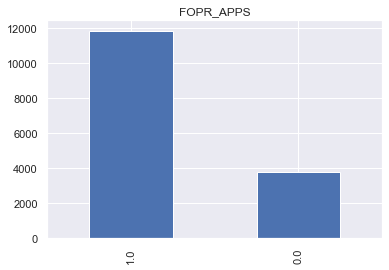

In [64]:
plot = df['FOPR_APPS'].value_counts().plot(kind='bar', title='FOPR_APPS')

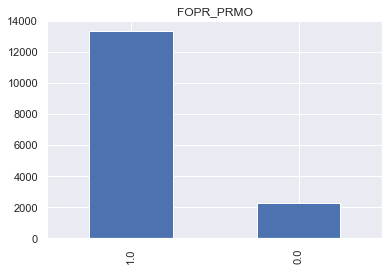

In [65]:
plot = df['FOPR_PRMO'].value_counts().plot(kind='bar', title='FOPR_PRMO')

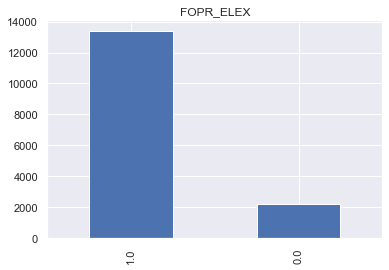

In [66]:
plot = df['FOPR_ELEX'].value_counts().plot(kind='bar', title='FOPR_ELEX')

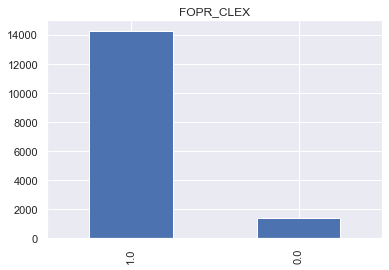

In [67]:
plot = df['FOPR_CLEX'].value_counts().plot(kind='bar', title='FOPR_CLEX')

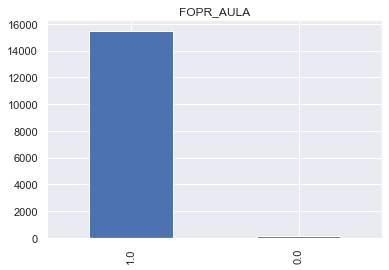

In [68]:
plot = df['FOPR_AULA'].value_counts().plot(kind='bar', title='FOPR_AULA')

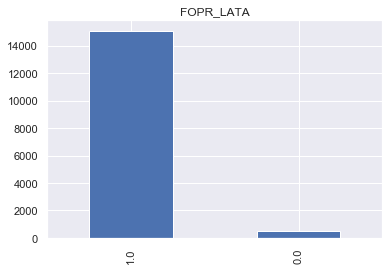

In [69]:
plot = df['FOPR_LATA'].value_counts().plot(kind='bar', title='FOPR_LATA')

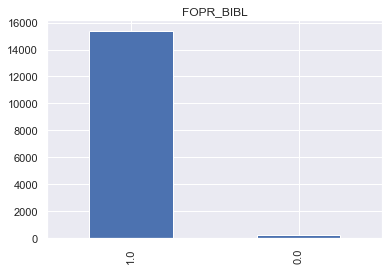

In [70]:
plot = df['FOPR_BIBL'].value_counts().plot(kind='bar', title='FOPR_BIBL')

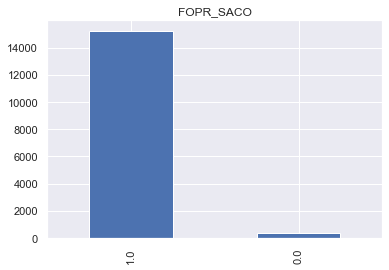

In [71]:
plot = df['FOPR_SACO'].value_counts().plot(kind='bar', title='FOPR_SACO')

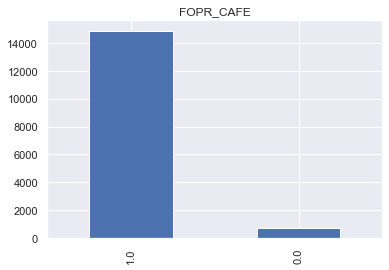

In [72]:
plot = df['FOPR_CAFE'].value_counts().plot(kind='bar', title='FOPR_CAFE')

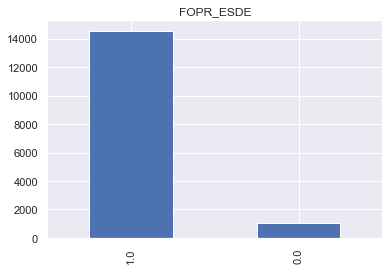

In [73]:
plot = df['FOPR_ESDE'].value_counts().plot(kind='bar', title='FOPR_ESDE')

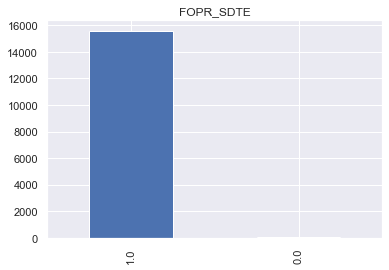

In [74]:
plot = df['FOPR_SDTE'].value_counts().plot(kind='bar', title='FOPR_SDTE')

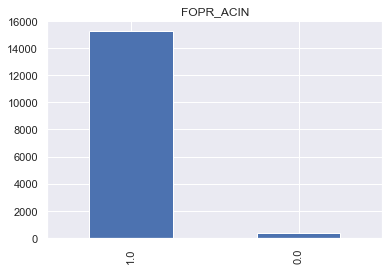

In [75]:
plot = df['FOPR_ACIN'].value_counts().plot(kind='bar', title='FOPR_ACIN')

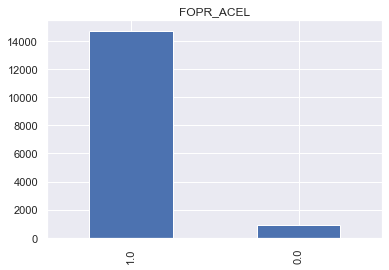

In [76]:
plot = df['FOPR_ACEL'].value_counts().plot(kind='bar', title='FOPR_ACEL')

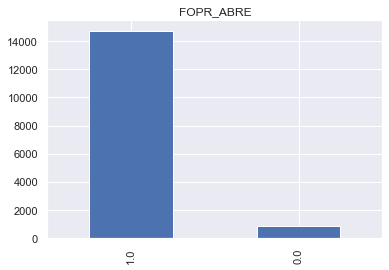

In [77]:
plot = df['FOPR_ABRE'].value_counts().plot(kind='bar', title='FOPR_ABRE')

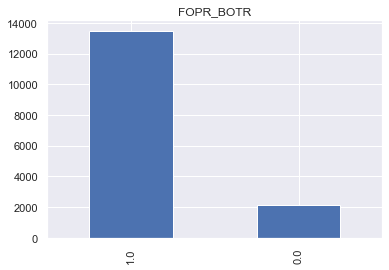

In [78]:
plot = df['FOPR_BOTR'].value_counts().plot(kind='bar', title='FOPR_BOTR')

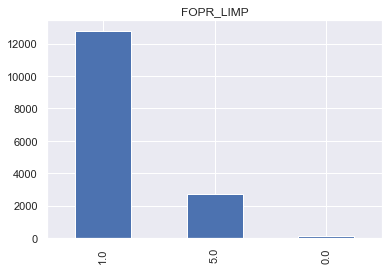

In [79]:
plot = df['FOPR_LIMP'].value_counts().plot(kind='bar', title='FOPR_LIMP')

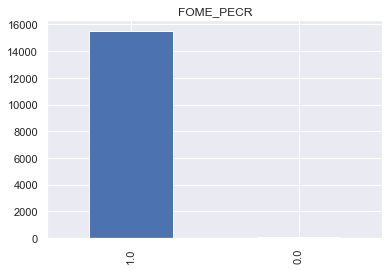

In [80]:
plot = df['FOME_PECR'].value_counts().plot(kind='bar', title='FOME_PECR')

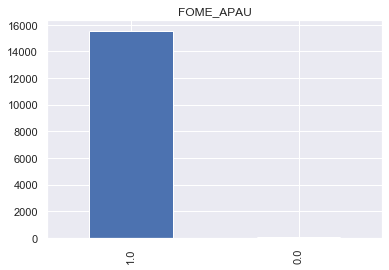

In [81]:
plot = df['FOME_APAU'].value_counts().plot(kind='bar', title='FOME_APAU')

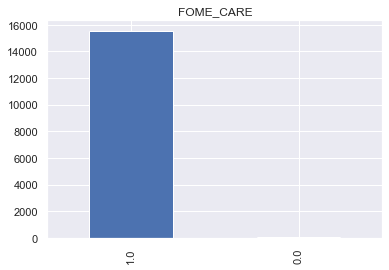

In [82]:
plot = df['FOME_CARE'].value_counts().plot(kind='bar', title='FOME_CARE')

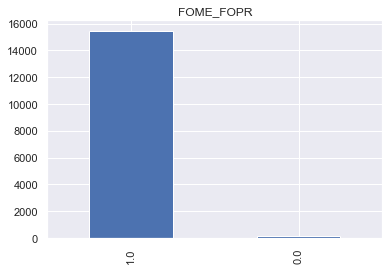

In [83]:
plot = df['FOME_FOPR'].value_counts().plot(kind='bar', title='FOME_FOPR')

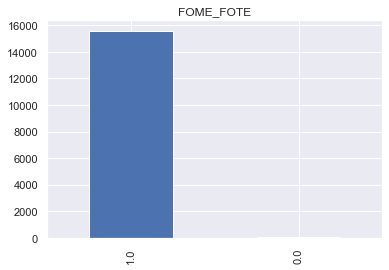

In [85]:
plot = df['FOME_FOTE'].value_counts().plot(kind='bar', title='FOME_FOTE')

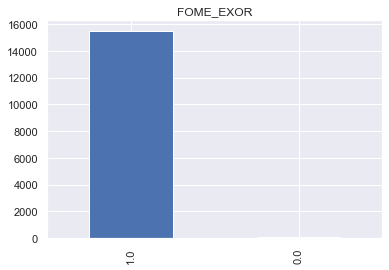

In [86]:
plot = df['FOME_EXOR'].value_counts().plot(kind='bar', title='FOME_EXOR')


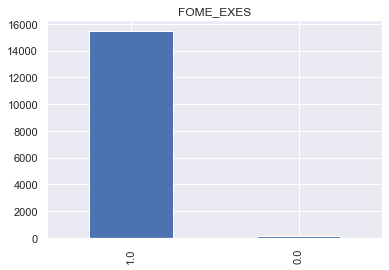

In [87]:
plot = df['FOME_EXES'].value_counts().plot(kind='bar', title='FOME_EXES')

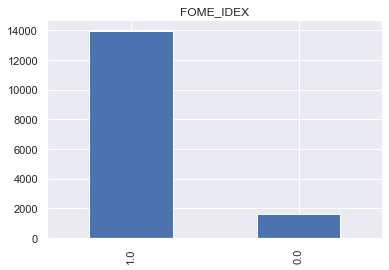

In [88]:
plot = df['FOME_IDEX'].value_counts().plot(kind='bar', title='FOME_IDEX')

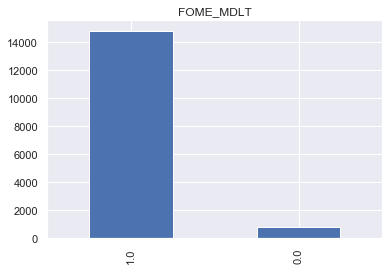

In [89]:
plot = df['FOME_MDLT'].value_counts().plot(kind='bar', title='FOME_MDLT')

In [94]:
pd.value_counts(df['FOME_LIDE'])

1.0    15368
0.0      245
Name: FOME_LIDE, dtype: int64

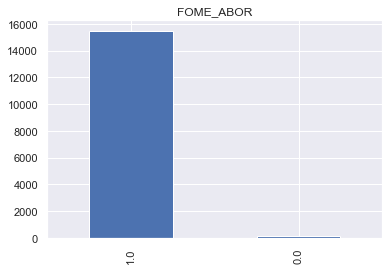

In [91]:
plot = df['FOME_ABOR'].value_counts().plot(kind='bar', title='FOME_ABOR')

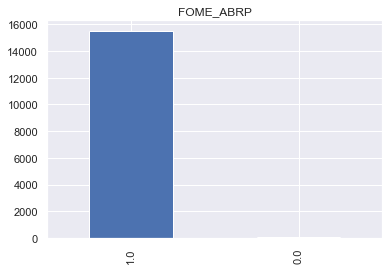

In [92]:
plot = df['FOME_ABRP'].value_counts().plot(kind='bar', title='FOME_ABRP')

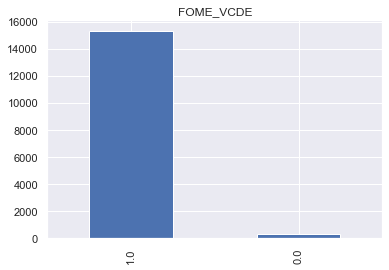

In [93]:
plot = df['FOME_VCDE'].value_counts().plot(kind='bar', title='FOME_VCDE')

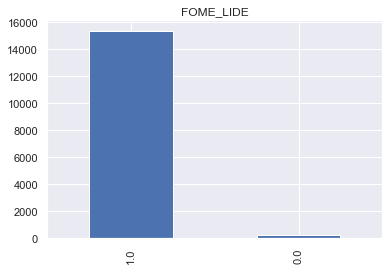

In [95]:
plot = df['FOME_LIDE'].value_counts().plot(kind='bar', title='FOME_LIDE')

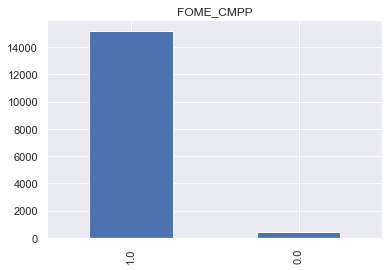

In [96]:
plot = df['FOME_CMPP'].value_counts().plot(kind='bar', title='FOME_CMPP')

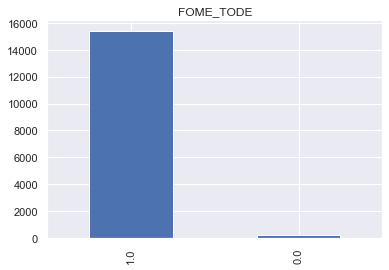

In [97]:
plot = df['FOME_TODE'].value_counts().plot(kind='bar', title='FOME_TODE')

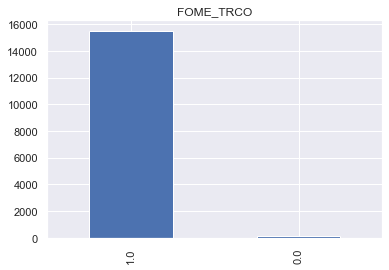

In [98]:
plot = df['FOME_TRCO'].value_counts().plot(kind='bar', title='FOME_TRCO')

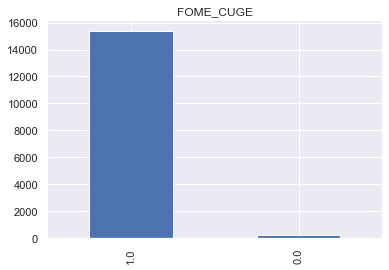

In [99]:
plot = df['FOME_CUGE'].value_counts().plot(kind='bar', title='FOME_CUGE')

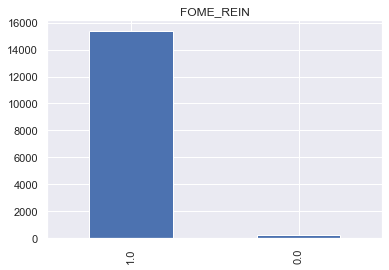

In [100]:
plot = df['FOME_REIN'].value_counts().plot(kind='bar', title='FOME_REIN')

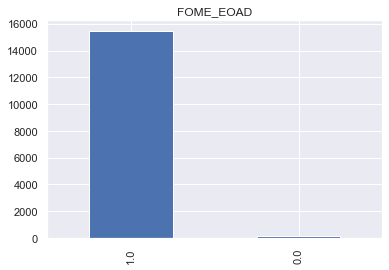

In [101]:
plot = df['FOME_EOAD'].value_counts().plot(kind='bar', title='FOME_EOAD')

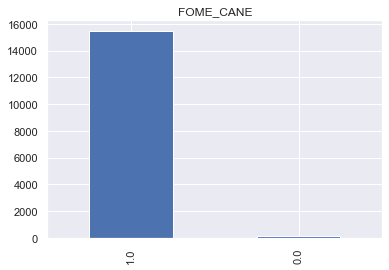

In [102]:
plot = df['FOME_CANE'].value_counts().plot(kind='bar', title='FOME_CANE')

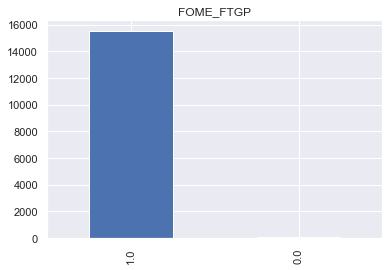

In [103]:
plot = df['FOME_FTGP'].value_counts().plot(kind='bar', title='FOME_FTGP')

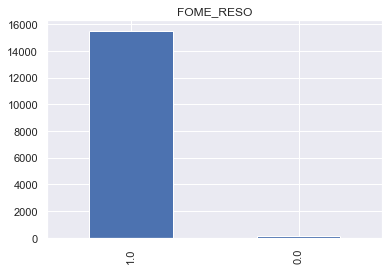

In [104]:
plot = df['FOME_RESO'].value_counts().plot(kind='bar', title='FOME_RESO')

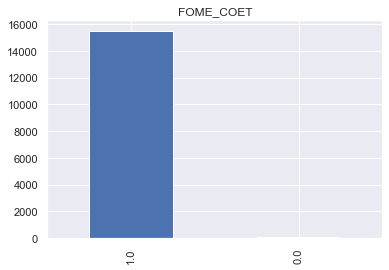

In [105]:
plot = df['FOME_COET'].value_counts().plot(kind='bar', title='FOME_COET')

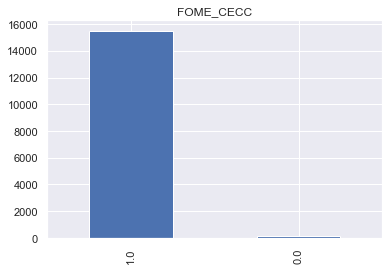

In [106]:
plot = df['FOME_CECC'].value_counts().plot(kind='bar', title='FOME_CECC')

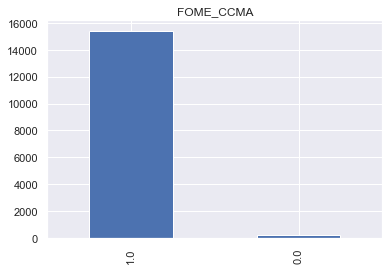

In [107]:
plot = df['FOME_CCMA'].value_counts().plot(kind='bar', title='FOME_CCMA')

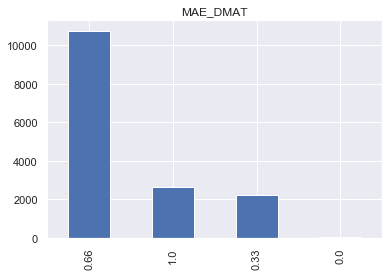

In [108]:
plot = df['MAE_DMAT'].value_counts().plot(kind='bar', title='MAE_DMAT')

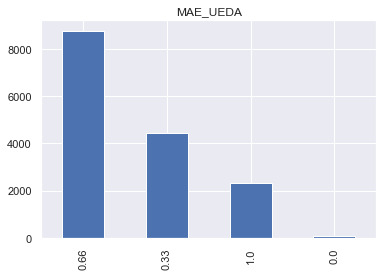

In [109]:
plot = df['MAE_UEDA'].value_counts().plot(kind='bar', title='MAE_UEDA')

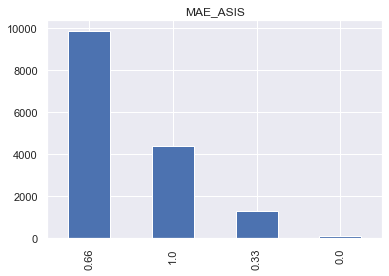

In [110]:
plot = df['MAE_ASIS'].value_counts().plot(kind='bar', title='MAE_ASIS')

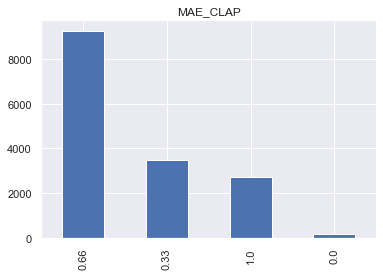

In [111]:
plot = df['MAE_CLAP'].value_counts().plot(kind='bar', title='MAE_CLAP')


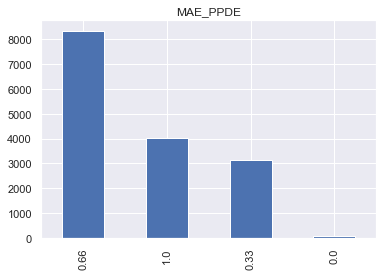

In [112]:
plot = df['MAE_PPDE'].value_counts().plot(kind='bar', title='MAE_PPDE')

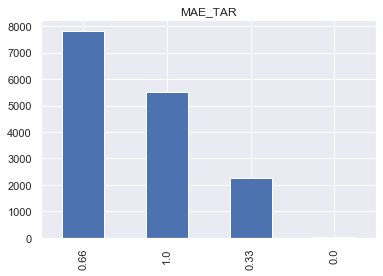

In [113]:
plot = df['MAE_TAR'].value_counts().plot(kind='bar', title='MAE_TAR')

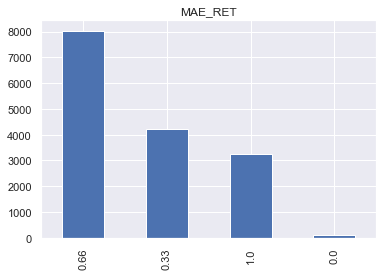

In [114]:
plot = df['MAE_RET'].value_counts().plot(kind='bar', title='MAE_RET')

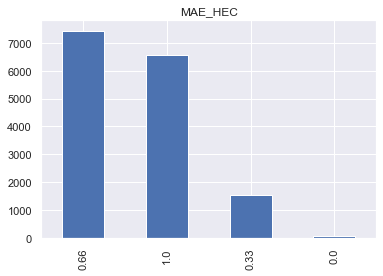

In [115]:
plot = df['MAE_HEC'].value_counts().plot(kind='bar', title='MAE_HEC')

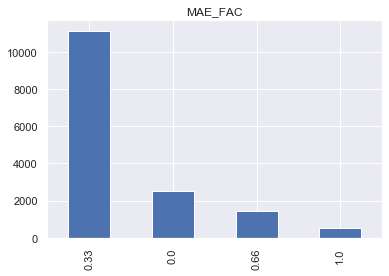

In [116]:
plot = df['MAE_FAC'].value_counts().plot(kind='bar', title='MAE_FAC')

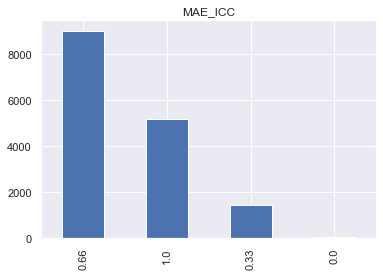

In [117]:
plot = df['MAE_ICC'].value_counts().plot(kind='bar', title='MAE_ICC')

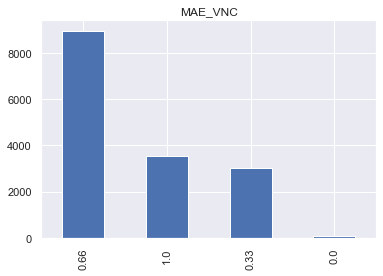

In [118]:
plot = df['MAE_VNC'].value_counts().plot(kind='bar', title='MAE_VNC')

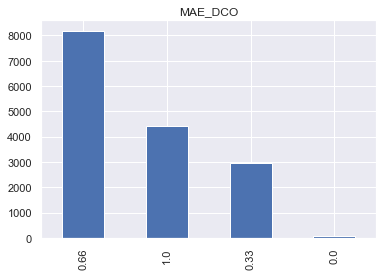

In [119]:
plot = df['MAE_DCO'].value_counts().plot(kind='bar', title='MAE_DCO')

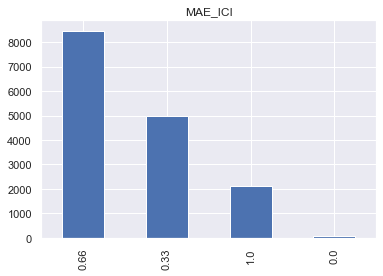

In [120]:
plot = df['MAE_ICI'].value_counts().plot(kind='bar', title='MAE_ICI')

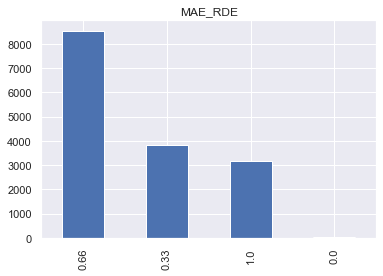

In [121]:
plot = df['MAE_RDE'].value_counts().plot(kind='bar', title='MAE_RDE')

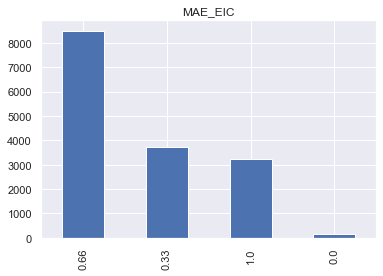

In [122]:
plot = df['MAE_EIC'].value_counts().plot(kind='bar', title='MAE_EIC')

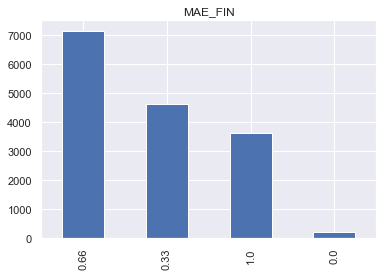

In [123]:
plot = df['MAE_FIN'].value_counts().plot(kind='bar', title='MAE_FIN')

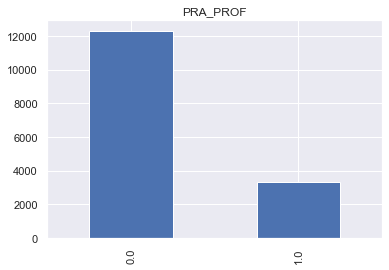

In [124]:
plot = df['PRA_PROF'].value_counts().plot(kind='bar', title='PRA_PROF')

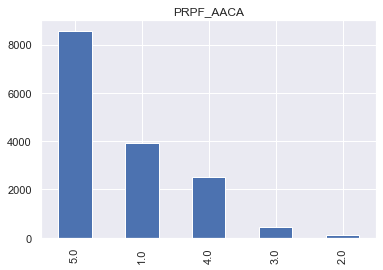

In [125]:
plot = df['PRPF_AACA'].value_counts().plot(kind='bar', title='PRPF_AACA')

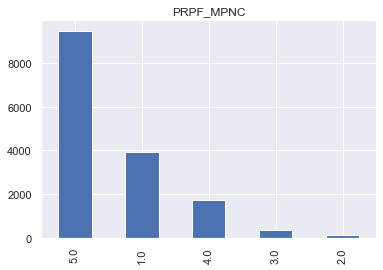

In [126]:
plot = df['PRPF_MPNC'].value_counts().plot(kind='bar', title='PRPF_MPNC')

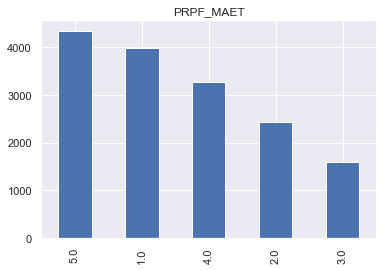

In [127]:
plot = df['PRPF_MAET'].value_counts().plot(kind='bar', title='PRPF_MAET')

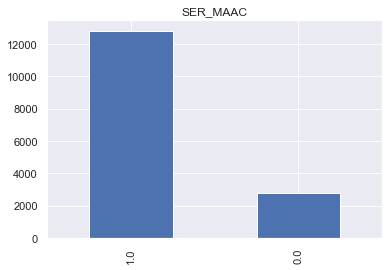

In [128]:
plot = df['SER_MAAC'].value_counts().plot(kind='bar', title='SER_MAAC')

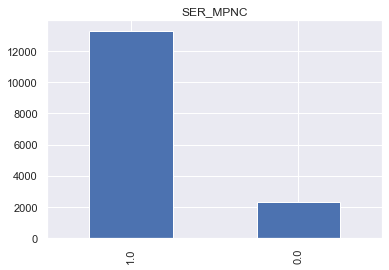

In [129]:
plot = df['SER_MPNC'].value_counts().plot(kind='bar', title='SER_MPNC')

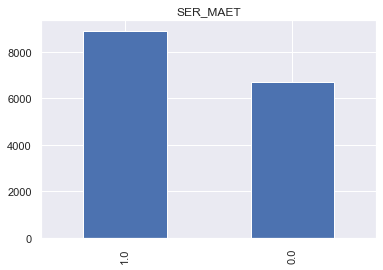

In [130]:
plot = df['SER_MAET'].value_counts().plot(kind='bar', title='SER_MAET')


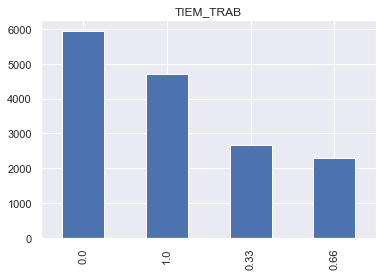

In [131]:
plot = df['TIEM_TRAB'].value_counts().plot(kind='bar', title='TIEM_TRAB')

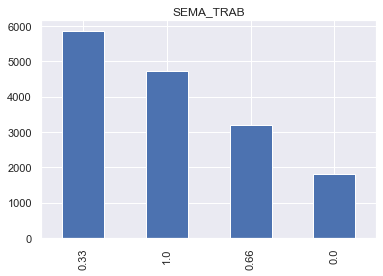

In [132]:
plot = df['SEMA_TRAB'].value_counts().plot(kind='bar', title='SEMA_TRAB')

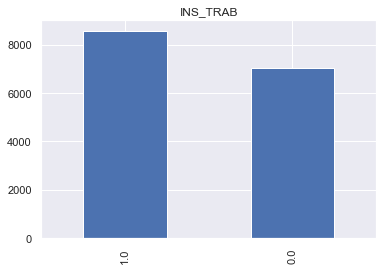

In [133]:
plot = df['INS_TRAB'].value_counts().plot(kind='bar', title='INS_TRAB')

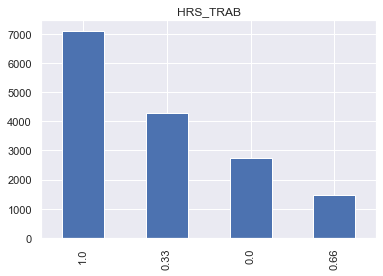

In [134]:
plot = df['HRS_TRAB'].value_counts().plot(kind='bar', title='HRS_TRAB')

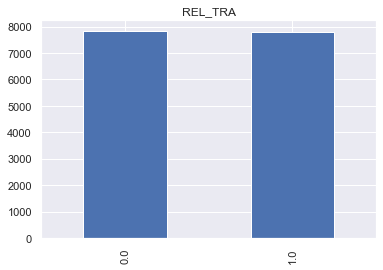

In [135]:
plot = df['REL_TRA'].value_counts().plot(kind='bar', title='REL_TRA')

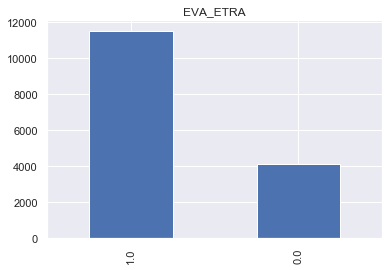

In [136]:
plot = df['EVA_ETRA'].value_counts().plot(kind='bar', title='EVA_ETRA')

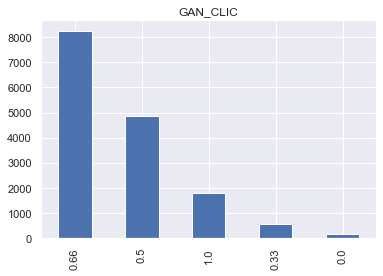

In [137]:
plot = df['GAN_CLIC'].value_counts().plot(kind='bar', title='GAN_CLIC')

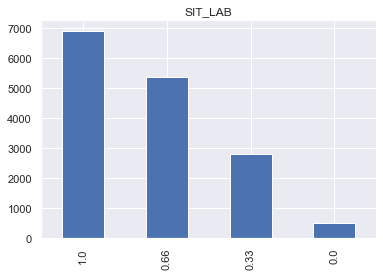

In [138]:
plot = df['SIT_LAB'].value_counts().plot(kind='bar', title='SIT_LAB')

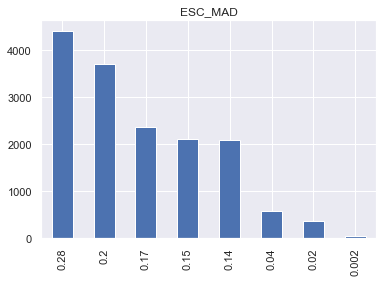

In [139]:
plot = df['ESC_MAD'].value_counts().plot(kind='bar', title='ESC_MAD')

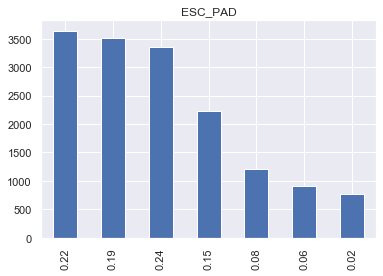

In [140]:
plot = df['ESC_PAD'].value_counts().plot(kind='bar', title='ESC_PAD')

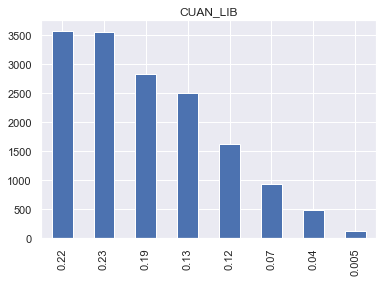

In [141]:
plot = df['CUAN_LIB'].value_counts().plot(kind='bar', title='CUAN_LIB')

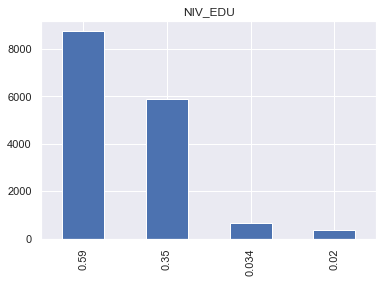

In [142]:
plot = df['NIV_EDU'].value_counts().plot(kind='bar', title='NIV_EDU')

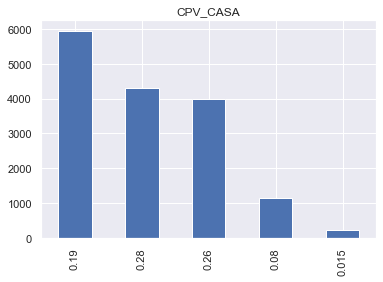

In [143]:
plot = df['CPV_CASA'].value_counts().plot(kind='bar', title='CPV_CASA')

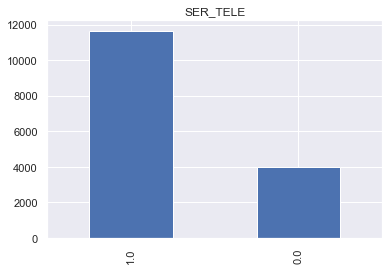

In [144]:
plot = df['SER_TELE'].value_counts().plot(kind='bar', title='SER_TELE')

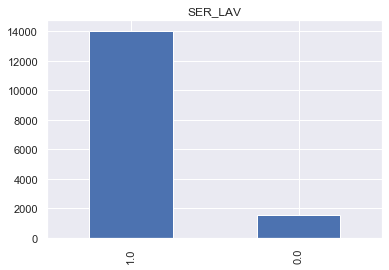

In [145]:
plot = df['SER_LAV'].value_counts().plot(kind='bar', title='SER_LAV')

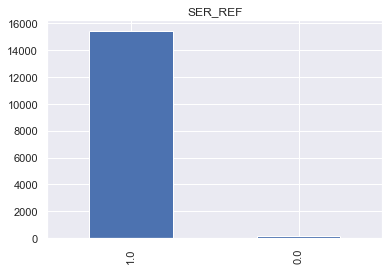

In [146]:
plot = df['SER_REF'].value_counts().plot(kind='bar', title='SER_REF')

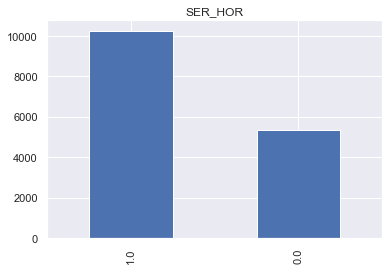

In [147]:
plot = df['SER_HOR'].value_counts().plot(kind='bar', title='SER_HOR')

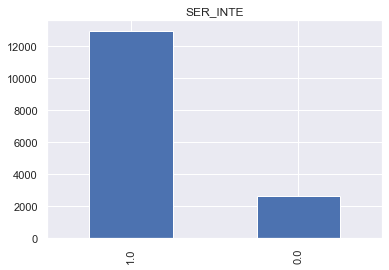

In [148]:
plot = df['SER_INTE'].value_counts().plot(kind='bar', title='SER_INTE')

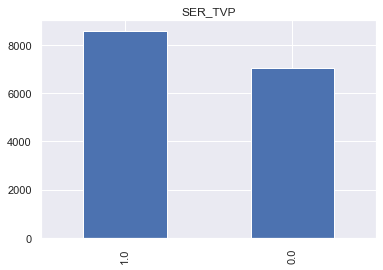

In [149]:
plot = df['SER_TVP'].value_counts().plot(kind='bar', title='SER_TVP')

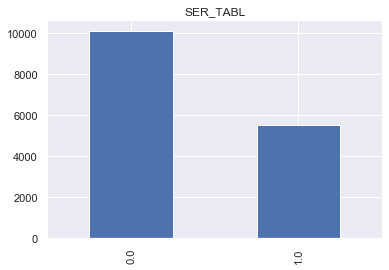

In [150]:
plot = df['SER_TABL'].value_counts().plot(kind='bar', title='SER_TABL')

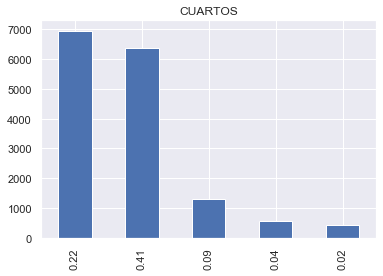

In [151]:
plot = df['CUARTOS'].value_counts().plot(kind='bar', title='CUARTOS')

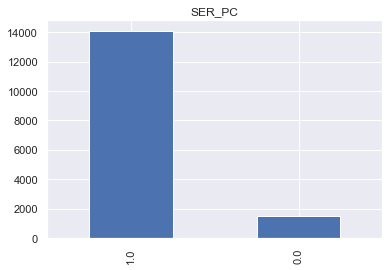

In [152]:
plot = df['SER_PC'].value_counts().plot(kind='bar', title='SER_PC')

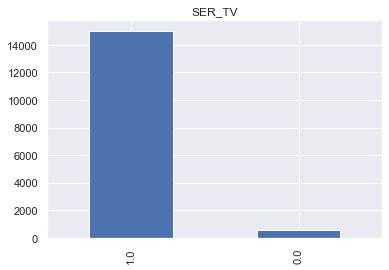

In [153]:
plot = df['SER_TV'].value_counts().plot(kind='bar', title='SER_TV')

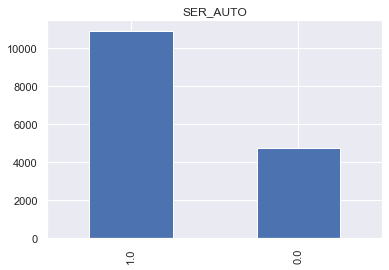

In [154]:
plot = df['SER_AUTO'].value_counts().plot(kind='bar', title='SER_AUTO')

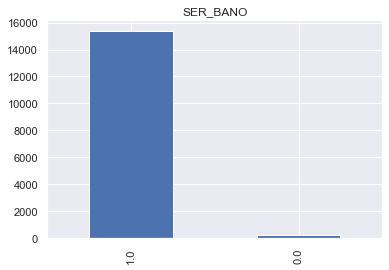

In [155]:
plot = df['SER_BANO'].value_counts().plot(kind='bar', title='SER_BANO')

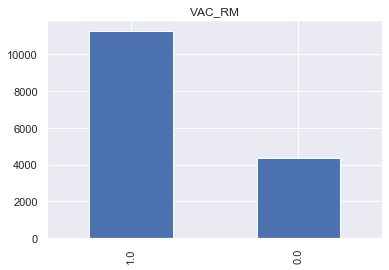

In [156]:
plot = df['VAC_RM'].value_counts().plot(kind='bar', title='VAC_RM')

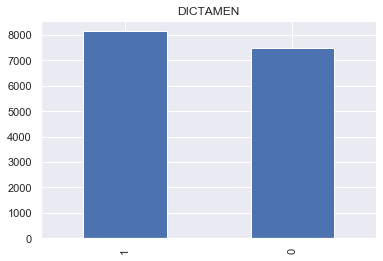

In [157]:
plot = df['DICTAMEN'].value_counts().plot(kind='bar', title='DICTAMEN')

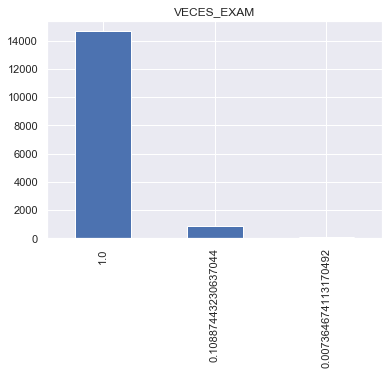

In [158]:
plot = df['VECES_EXAM'].value_counts().plot(kind='bar', title='VECES_EXAM')